# Steps

- Obtain trace of n9000b
- Sort spectrum vector, obtain minimum power idx, calculate threshold adding 3dB to min peak
- Separate signal array, and noiser array
- Calculate SNR given for the two arrays

## Examples of SNR Estimation Using the N9000B CXA Signal Analyzer

The Keysight N9000B CXA Signal Analyzer can be used for signal-to-noise ratio (SNR) estimation across a wide range of applications in RF and wireless testing. This tool is suitable for essential signal characterization in both research and industrial environments.

### Typical SNR Estimation Process

Below are common steps and example approaches for estimating SNR using the N9000B CXA:

#### 1. **Signal Spectrum Measurement**

- **Connect** the device under test (DUT) to the RF input of the N9000B CXA.
- **Set frequency span and center frequency** to cover the signal of interest.
- **Capture** the signal using the analyzer’s spectrum display.

#### 2. **Measuring Signal Power**

- Use **marker functions** to identify the peak of the desired signal on the spectrum plot.
- **Read and log** the signal’s power in dBm directly from the marker readout at the carrier or main lobe.

#### 3. **Measuring Noise Power**

- **Set markers** in a nearby frequency region where no signal is present (only noise).
- **Use band power or noise marker tools** (if available) to measure the average noise floor level in dBm.

#### 4. **Calculating SNR**

- **Subtract** the measured noise power from the measured signal power (both in dB units):

  $$
  \mathrm{SNR\ (dB)} = P_{\text{signal}} - P_{\text{noise}}
  $$

- If your instrument provides “band/adjacent channel power” or “channel measurements”, it can directly report SNR for modulated signals over standard measurement bandwidths.

### Example: SNR Measurement Procedure

| Step            | Procedure with N9000B CXA                                     |
|-----------------|--------------------------------------------------------------|
| Setup           | Connect DUT to RF input, set center frequency and span.      |
| Signal Power    | Place marker at carrier frequency, read peak amplitude.      |
| Noise Power     | Place marker off-signal, use noise marker function, read value. |
| SNR Calculation | Compute difference: $$ \mathrm{SNR\ (dB)} = P_{\text{signal}} - P_{\text{noise}} $$ |

### Enhanced SNR Measurement Capabilities

- The N9000B CXA supports applications such as **analog/digital demodulation**, where **SNR can be measured automatically** along with other modulation quality indicators.
- When equipped with **vector signal analysis (VSA) software**, the analyzer allows for advanced SNR, Error Vector Magnitude (EVM), and adjacent channel measurements, providing direct SNR figures for complex signals like QAM, PSK, or OFDM.
- **Wide dynamic range** and low displayed average noise level (DANL) of the CXA facilitate SNR measurements even for weak signals[1][2].

### Practical Tips

- **Use narrow resolution bandwidth (RBW)** to improve noise power measurement accuracy.
- **Average multiple sweeps** to stabilize noise floor readings.
- **Apply preamplification** (if present) for low signal levels to enhance measurement sensitivity.

### Example Application Scenarios

- **Wireless transmitter testing:** SNR estimation over the main carrier to validate spectral purity and emission compliance.
- **EMI/EMC testing:** Characterizing SNR surrounding unwanted emissions to ensure standards compliance[3].
- **Lab education:** Demonstrating SNR fundamentals by measuring and comparing signal and noise in different RF scenarios[4][2].

### Summary Table: Key Performance for SNR Estimation

| Feature                | N9000B CXA Example Value                   |
|------------------------|--------------------------------------------|
| Frequency Range        | 9 kHz to 26.5 GHz                          |
| DANL (at 2 GHz, preamp on) | -163 dBm                               |
| Amplitude Accuracy     | ±0.5 dB                                    |
| Measurement Applications | Analog/digital demod, spectrum, EMI/EMC  |

The N9000B CXA offers a robust and accessible platform for SNR estimation with straightforward workflows, wide support for measurement applications, and industry-standard accuracy[1][4][2].

[1] https://www.farnell.com/datasheets/2057850.pdf
[2] https://www.meilhaus.de/en/n9000b.htm
[3] https://www.keysight.com/zz/en/assets/9018-04781/technical-specifications/9018-04781.pdf
[4] https://www.altoo.dk/Keysight+N9000B+CXA+Signal+Analyzer-+Multi-touch.htm
[5] https://www.testunlimited.com/pdf/an/keysight_N9000A_specifications%20guide.pdf
[6] https://www.datatec.eu/media/1c/30/ec/1673527586/Keysight-N9000B-OV-1_DE.pdf.pdf
[7] https://smlouvy.gov.cz/smlouva/soubor/38330184/P%C5%99%C3%ADlohy%20kupn%C3%AD%20smlouvy_RS.pdf
[8] https://www.keysight.com/se/en/support/N9000B/cxa-signal-analyzer-multi-touch-9-khz-26-5-ghz.html
[9] https://assets-us-01.kc-usercontent.com/ecb176a6-5a2e-0000-8943-84491e5fc8d1/0d6930c8-0975-4cc4-9118-fe1d51964341/KT-N9000Bconfig.pdf
[10] https://www.keysight.com/us/en/assets/7018-05063/configuration-guides/5992-1275.pdf
[11] https://docs.rs-online.com/ad9c/A700000011062834.pdf
[12] https://www.keysight.com/nl/en/product/N9000B/cxa-signal-analyzer-multi-touch-9-khz-26-5-ghz.html
[13] https://www.keysight.com/de/de/assets/9018-04353/installation-guides/9018-04353.pdf
[14] https://xdevs.com/doc/HP_Agilent_Keysight/N9000-90018%20N9000A%20CXA%20Signal%20Analyzer%20Service%20Guide%20%5B322%5D.pdf
[15] https://interlligent.co.uk/product/n9000b-cxa-signal-analyzer-multi-touch-9-khz-to-26-5-ghz/
[16] https://www.keysight.com.cn/cn/zh/assets/9018-07410/release-notes/9018-07410.pdf
[17] https://www.batterfly.com/shop/en/keysight-n9000b-513
[18] https://www.testequity.com/product/24983-23-N9000B-526
[19] https://keysight-docs.s3-us-west-2.amazonaws.com/keysight-pdfs/N9030B/Measuring+Receiver+Mode+User_s+_+Programmer_.pdf
[20] https://www.youtube.com/watch?v=pACzyuvcRYM

In [10]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N9000B_IP = '169.254.192.72'
VISA_TIMEOUT_MS = 5000  # 5 segundos

# SNR example using dBm to Watt conversion

Conectando al analizador...
Instrumento conectado: Keysight Technologies,N9000B,MY57102322,A.34.06
Solicitando datos de traza...
Traza adquirida...
Shape trace: (4096,)
Noise floor:  -80.60819315

SNR (Lineal): 7.17
SNR (dB): 8.55 dB


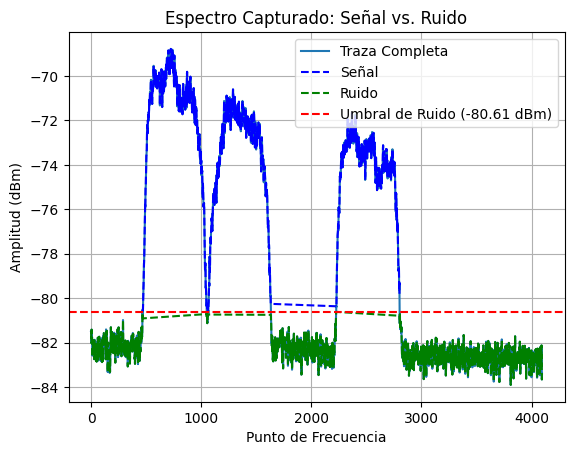

Conexión cerrada.


In [11]:

try:
    # Iniciar PyVISA
    rm = pyvisa.ResourceManager('@py')
    inst = rm.open_resource(f'TCPIP::{N9000B_IP}::INSTR')
    inst.timeout = VISA_TIMEOUT_MS

    # Consultar identificación
    print("Conectando al analizador...")
    idn = inst.query('*IDN?')
    print(f"Instrumento conectado: {idn.strip()}")

    # Limpiar errores anteriores
    inst.write('*CLS')

    inst.write(':FREQ:CENT 785e6') 
    inst.write(':FREQ:SPAN 70e6')       
    inst.write(':BAND:RES 680e3')        

    # Obtener los datos de la traza activa
    print("Solicitando datos de traza...")
    inst.write(':FORM ASC')  # Asegura formato ASCII (más simple para pruebas)
    trace_data = inst.query_ascii_values(':TRACe:DATA? TRACE1')
    print("Traza adquirida...")
    print("Shape trace:", np.shape(trace_data))

    sort_trace = np.sort(np.array(trace_data))

    noise_floor = sort_trace[0] + 3.3  #Sum 3dB to minimum peak

    print("Noise floor: ", noise_floor)

    signal_array = []
    noise_array = []
    signal_indices = []
    noise_indices = []

    for i, power in enumerate(trace_data):
        if power >= noise_floor:
            signal_array.append(power)
            signal_indices.append(i) # Store index for plotting
        else:
            noise_array.append(power)
            noise_indices.append(i) # Store index for plotting

    signal_array = np.array(signal_array)
    noise_array = np.array(noise_array)

    # La fórmula es P_watts = 10^((P_dBm - 30) / 10)
    def dbm_to_watts(dbm_value):
        return 10**((dbm_value - 30) / 10)

    # 2. Convertir los arrays de señal y ruido de dBm a Watts
    signal_watts = [dbm_to_watts(p) for p in signal_array]
    noise_watts = [dbm_to_watts(p) for p in noise_array]

    # Convertir a numpy arrays para facilitar las sumas
    signal_watts = np.array(signal_watts)
    noise_watts = np.array(noise_watts)

    total_signal_power_watts = np.sum(signal_watts)
    total_noise_power_watts = np.sum(noise_watts)

        # 4. Calcular el SNR
    # Asegúrate de que la potencia de ruido no sea cero para evitar división por cero
    if total_noise_power_watts > 0:
        snr_linear = total_signal_power_watts / total_noise_power_watts
        snr_db = 10 * np.log10(snr_linear)

        print(f"\nSNR (Lineal): {snr_linear:.2f}")
        print(f"SNR (dB): {snr_db:.2f} dB")
    else:
        print("\nNo se puede calcular el SNR: La potencia total de ruido es cero o negativa.")
        print("Esto puede ocurrir si el 'noise_array' está vacío o si todos los puntos fueron clasificados como señal.")

    
    plt.plot(trace_data, label='Traza Completa')
    plt.plot(signal_indices, signal_array, '--', color='blue', label='Señal')
    plt.plot(noise_indices, noise_array, '--', color='green', label='Ruido')

    plt.axhline(y=noise_floor, color='r', linestyle='--', label=f'Umbral de Ruido ({noise_floor:.2f} dBm)')
    plt.title("Espectro Capturado: Señal vs. Ruido")
    plt.xlabel("Punto de Frecuencia")
    plt.ylabel("Amplitud (dBm)")
    plt.grid(True)
    plt.legend() # Show the labels
    plt.show()

except Exception as e:
    print(f"Error: {e}")

finally:
    if 'inst' in locals():
        inst.close()
        print("Conexión cerrada.")

        

# Ejemplo SNR 

In [ ]:
try:
    # Iniciar PyVISA
    rm = pyvisa.ResourceManager('@py')
    inst = rm.open_resource(f'TCPIP::{N9000B_IP}::INSTR')
    inst.timeout = VISA_TIMEOUT_MS

    # Consultar identificación
    print("Conectando al analizador...")
    idn = inst.query('*IDN?')
    print(f"Instrumento conectado: {idn.strip()}")

    # Limpiar errores anteriores
    inst.write('*CLS')

    inst.write(':FREQ:CENT 785e6') 
    inst.write(':FREQ:SPAN 70e6')       
    inst.write(':BAND:RES 680e3')        

    # Obtener los datos de la traza activa
    print("Solicitando datos de traza...")
    inst.write(':FORM ASC')  # Asegura formato ASCII (más simple para pruebas)
    trace_data = inst.query_ascii_values(':TRACe:DATA? TRACE1')
    print("Traza adquirida...")

    sort_trace = np.sort(np.array(trace_data))

    noise_floor = sort_trace[0] + 2.5  #Sum 3dB to minimum peak

    print("Noise floor: ", noise_floor)

    signal_array = []
    noise_array = []
    signal_indices = []
    noise_indices = []

    for i, power in enumerate(trace_data):
        if power >= noise_floor:
            signal_array.append(power)
            signal_indices.append(i) # Store index for plotting
        else:
            noise_array.append(power)
            noise_indices.append(i) # Store index for plotting

    signal_array = np.array(signal_array)
    noise_array = np.array(noise_array)

    # La fórmula es P_watts = 10^((P_dBm - 30) / 10)
    def dbm_to_watts(dbm_value):
        return 10**((dbm_value - 30) / 10)

    # 2. Convertir los arrays de señal y ruido de dBm a Watts
    signal_watts = [dbm_to_watts(p) for p in signal_array]
    noise_watts = [dbm_to_watts(p) for p in noise_array]

    # Convertir a numpy arrays para facilitar las sumas
    signal_watts = np.array(signal_watts)
    noise_watts = np.array(noise_watts)

    total_signal_power_watts = np.sum(signal_watts)
    total_noise_power_watts = np.sum(noise_watts)

        # 4. Calcular el SNR
    # Asegúrate de que la potencia de ruido no sea cero para evitar división por cero
    if total_noise_power_watts > 0:
        snr_linear = total_signal_power_watts / total_noise_power_watts
        snr_db = 10 * np.log10(snr_linear)

        print(f"\nSNR (Lineal): {snr_linear:.2f}")
        print(f"SNR (dB): {snr_db:.2f} dB")
    else:
        print("\nNo se puede calcular el SNR: La potencia total de ruido es cero o negativa.")
        print("Esto puede ocurrir si el 'noise_array' está vacío o si todos los puntos fueron clasificados como señal.")

    
    plt.plot(trace_data, label='Traza Completa')
    #plt.plot(signal_indices, signal_array, '--', color='blue', label='Señal')
    #plt.plot(noise_indices, noise_array, '--', color='green', label='Ruido')

    plt.axhline(y=noise_floor, color='r', linestyle='--', label=f'Umbral de Ruido ({noise_floor:.2f} dBm)')
    plt.title("Espectro Capturado: Señal vs. Ruido")
    plt.xlabel("Punto de Frecuencia")
    plt.ylabel("Amplitud (dBm)")
    plt.grid(True)
    plt.legend() # Show the labels
    plt.show()

except Exception as e:
    print(f"Error: {e}")

finally:
    if 'inst' in locals():
        inst.close()
        print("Conexión cerrada.")


In [ ]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import torch

# --- Parámetros del Analizador de Espectro N9000B ---
N9000B_IP = '169.254.192.72'
VISA_TIMEOUT_MS = 5000  # 5 segundos

# --- Clase para Análisis de Espectro ---
class SpectrumAnalyzer:
    def __init__(self):
        """
        Inicializa la clase SpectrumAnalyzer.
        """
        pass

    def estimate_snr_from_dbm_trace(self, signal_powers_dbm, noise_powers_dbm):
        """
        Estima el SNR en dB utilizando los componentes de señal y ruido en dBm.
        Adapta la lógica de cálculo de SNR del código PyTorch original.

        Args:
            signal_powers_dbm (torch.Tensor): Tensor de potencias de señal en dBm.
            noise_powers_dbm (torch.Tensor): Tensor de potencias de ruido en dBm.

        Returns:
            float: SNR en dB.
        """
        # Convertir potencias de dBm a una escala lineal para el cálculo de SNR
        # La fórmula 10^(dBm/10) convierte dBm a una escala lineal de potencia (e.g., mW si 0 dBm = 1 mW)
        signal_linear_powers = torch.pow(10.0, signal_powers_dbm / 10.0)
        noise_linear_powers = torch.pow(10.0, noise_powers_dbm / 10.0)

        # Calcular la potencia promedio de la señal (equivalente a torch.mean(signal_clean ** 2))
        # Aquí, signal_linear_powers ya son potencias, no amplitudes, por lo que no se elevan al cuadrado.
        power_signal_avg = torch.mean(signal_linear_powers)

        # Calcular la potencia promedio del ruido (equivalente a noise_var en el código original)
        noise_power_avg = torch.mean(noise_linear_powers)

        if noise_power_avg > 1e-12:  # Añadir un pequeño épsilon para evitar división por cero
            snr_linear = power_signal_avg / noise_power_avg
            snr_db = 10 * torch.log10(snr_linear)

            print(f"\nSNR (Lineal): {snr_linear:.2f}")
            print(f"SNR (dB): {snr_db:.2f} dB")
            return snr_db.item()
        else:
            print("\nNo se puede calcular el SNR: La potencia promedio de ruido es cero o negativa.")
            print("Esto puede ocurrir si todos los puntos fueron clasificados como señal o el ruido es extremadamente bajo.")
            return float('nan')

    def plot_spectrum(self, frequencies_hz, trace_data_torch, signal_indices, signal_powers_dbm,
                      noise_indices, noise_powers_dbm, noise_floor_dbm, center_freq, span_freq):
        """
        Grafica el espectro adquirido, mostrando la separación entre señal y ruido.

        Args:
            frequencies_hz (torch.Tensor): Frecuencias en Hz para el eje X.
            trace_data_torch (torch.Tensor): Datos de la traza completa en dBm.
            signal_indices (torch.Tensor): Índices de los puntos clasificados como señal.
            signal_powers_dbm (torch.Tensor): Potencias de los puntos de señal en dBm.
            noise_indices (torch.Tensor): Índices de los puntos clasificados como ruido.
            noise_powers_dbm (torch.Tensor): Potencias de los puntos de ruido en dBm.
            noise_floor_dbm (torch.Tensor): Umbral del piso de ruido en dBm.
            center_freq (float): Frecuencia central del barrido en Hz.
            span_freq (float): Span del barrido en Hz.
        """
        plt.figure(figsize=(12, 6))
        plt.plot(frequencies_hz.numpy() / 1e6, trace_data_torch.numpy(), label='Traza Completa (dBm)', color='gray', alpha=0.7)
        plt.plot(frequencies_hz[signal_indices].numpy() / 1e6, signal_powers_dbm.numpy(), 'o', color='blue', markersize=4, label='Componentes de Señal')
        plt.plot(frequencies_hz[noise_indices].numpy() / 1e6, noise_powers_dbm.numpy(), 'x', color='green', markersize=4, label='Componentes de Ruido')

        plt.axhline(y=noise_floor_dbm.numpy(), color='red', linestyle='--', label=f'Umbral de Ruido ({noise_floor_dbm:.2f} dBm)')

        plt.title(f"Traza del Analizador de Espectro: Señal vs. Ruido (Centro: {center_freq / 1e6:.2f} MHz, Span: {span_freq / 1e6:.2f} MHz)")
        plt.xlabel("Frecuencia (MHz)")
        plt.ylabel("Amplitud (dBm)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

try:
    # --- Configuración PyVISA y Conexión al Instrumento ---
    rm = pyvisa.ResourceManager('@py')
    inst = rm.open_resource(f'TCPIP::{N9000B_IP}::INSTR')
    inst.timeout = VISA_TIMEOUT_MS

    print("Conectando al analizador...")
    idn = inst.query('*IDN?')
    print(f"Instrumento conectado: {idn.strip()}")

    # Limpiar errores anteriores
    inst.write('*CLS')

    # --- Configuración del Instrumento y Obtención de Parámetros ---
    # Obtener la configuración actual de frecuencia para mapear correctamente los datos
    center_freq_str = inst.query(':FREQ:CENT?')
    span_freq_str = inst.query(':FREQ:SPAN?')
    rbw_str = inst.query(':BAND:RES?') # No se usa directamente en el cálculo, pero es útil para información

    center_freq = float(center_freq_str)
    span_freq = float(span_freq_str)
    rbw = float(rbw_str)

    print(f"Frecuencia Central: {center_freq / 1e6:.2f} MHz")
    print(f"Span: {span_freq / 1e6:.2f} MHz")
    print(f"Ancho de Banda de Resolución (RBW): {rbw / 1e3:.2f} kHz")

    # --- Adquisición de Datos de la Traza ---
    print("Solicitando datos de traza...")
    inst.write(':FORM ASC')  # Asegura formato ASCII
    trace_data_list = inst.query_ascii_values(':TRACe:DATA? TRACE1')
    print("Traza adquirida.")

    # Convertir los datos adquiridos a un tensor de PyTorch
    trace_data_torch = torch.tensor(trace_data_list, dtype=torch.float64)
    num_points = len(trace_data_torch)

    # Calcular las frecuencias reales para el eje X
    start_freq = center_freq - (span_freq / 2)
    end_freq = center_freq + (span_freq / 2)
    frequencies_hz = torch.linspace(start_freq, end_freq, num_points, dtype=torch.float64)

    # --- Separación de Señal y Ruido (usando PyTorch) ---
    # Ordenar los datos de la traza para estimar el valor mínimo
    sorted_trace_torch = torch.sort(trace_data_torch).values
    # Definir el piso de ruido como el valor mínimo de potencia + 3.3 dBm
    noise_floor_dbm = sorted_trace_torch[0] + 3.3
    print(f"Umbral de Piso de Ruido Calculado: {noise_floor_dbm:.2f} dBm")

    # Crear máscaras para señal y ruido basadas en el umbral
    is_signal = trace_data_torch >= noise_floor_dbm
    is_noise = trace_data_torch < noise_floor_dbm

    # Separar componentes de señal y ruido usando las máscaras
    signal_powers_dbm = trace_data_torch[is_signal]
    noise_powers_dbm = trace_data_torch[is_noise]

    # Obtener índices para graficar
    signal_indices = torch.nonzero(is_signal, as_tuple=True)[0]
    noise_indices = torch.nonzero(is_noise, as_tuple=True)[0]

    # --- Cálculo de SNR y Graficado ---
    analyzer = SpectrumAnalyzer()

    # Calcular SNR utilizando la función adaptada
    analyzer.estimate_snr_from_dbm_trace(signal_powers_dbm, noise_powers_dbm)

    # Graficar el espectro
    analyzer.plot_spectrum(frequencies_hz, trace_data_torch, signal_indices, signal_powers_dbm,
                           noise_indices, noise_powers_dbm, noise_floor_dbm, center_freq, span_freq)

except pyvisa.errors.VisaIOError as e:
    print(f"Error de VISA: No se pudo conectar al instrumento o ocurrió un error de comunicación. Verifique la dirección IP y la conexión. Error: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

finally:
    if 'inst' in locals() and inst.resource_name:
        inst.close()
        print("Conexión cerrada.")
